## SSAC - Exploration 7 - Face Embedding : Find celebrity look alike face recognition

In [1]:
# import required packages
import face_recognition
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

1. preprocess data

1-1. pactice load, crop and save with my pictures

[(73, 149, 135, 87)]


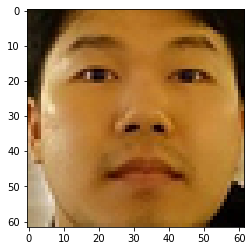

In [2]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/na/나1.jpg'
na1 = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(na1)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_na1 = na1[a:c,d:b,:]

plt.imshow(cropped_na1)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

[(93, 613, 316, 390)]


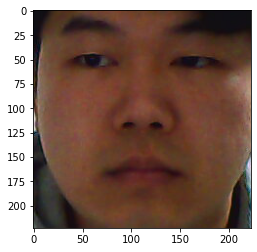

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/na/나2.jpg'
na2 = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(na2)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_na2 = na2[a:c,d:b,:]

plt.imshow(cropped_na2)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [4]:
save_path = os.getenv('HOME')+'/aiffel/face_embedding/images/na/cropped'
save_path

'/home/ssac7/aiffel/face_embedding/images/na/cropped'

In [5]:
file = 'na1.jpg'
save_file_path = os.path.join(save_path, file)
save_file_path

'/home/ssac7/aiffel/face_embedding/images/na/cropped/na1.jpg'

In [6]:
# save image
pillow_image = Image.fromarray(cropped_na1)
pillow_image.save(save_file_path)

In [7]:
file = 'na2.jpg'
save_file_path = os.path.join(save_path, file)
pillow_image = Image.fromarray(cropped_na2)
pillow_image.save(save_file_path)

/home/ssac7/aiffel/face_embedding/images/na/cropped/na1.jpg
/home/ssac7/aiffel/face_embedding/images/na/cropped/na2.jpg


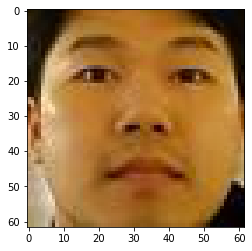

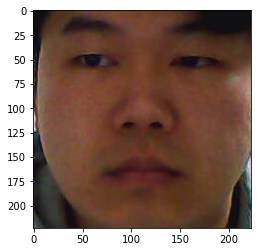

In [8]:
# load saved images
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/na/cropped'
file_list = os.listdir(dir_path)

for i in range(len(file_list)):
    file_path = os.path.join(dir_path, file_list[i])
    image = face_recognition.load_image_file(file_path)
    print(file_path)
    plt.figure()
    plt.imshow(image)

1-2. load celebrity pictures, crop face appearing area and save cropped pictures

In [9]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrities'
file_list = os.listdir(dir_path)

print(f'file_list_sample 10 : {file_list[0:10]}')
print(f'total number of files : {len(file_list)}')

file_list_sample 10 : ['수호.jpg', '정형돈.jpg', '길.jpg', '손예진.jpeg', '강하늘.jpeg', '최무성.jpg', '정우성.jpeg', '최준석.jpg', '황병국.jpg', '감우성.jpg']
total number of files : 291


In [10]:
len(file_list)

291

In [12]:
# check if folder name for crpped images is included in file_list
set(['exist' for file in file_list if 'cropped' in file])

{'exist'}

In [13]:
from tqdm import tqdm # iteration prgoress bar

# define function to crop face area and save cropped image
def crop_and_save_picture(file_list):
    
    for file in tqdm(file_list):
        try:
            img_path = os.path.join(dir_path, file)
            if img_path == save_path:
                continue
            image = face_recognition.load_image_file(img_path)
            face_locations = face_recognition.face_locations(image)
            a, b, c, d = face_locations[0]
            cropped_face = image[a:c,d:b,:]
            save_file_path = os.path.join(save_path, file)
            pillow_image = Image.fromarray(cropped_face)
            pillow_image.save(save_file_path)
        except:
            print('error occured')
            print(img_path)
    
    cropped_file_list = os.listdir(save_path)
    print('Ta da!')
    print(f'cropped {len(cropped_file_list)} pictures')

In [14]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrities'
save_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrities/cropped'

In [15]:
import time
start = time.time()
crop_and_save_picture(file_list)
print(f'time elasped : {time.time()-start}')

 66%|██████▋   | 193/291 [00:38<00:23,  4.13it/s]

error occured
/home/ssac7/aiffel/face_embedding/images/celebrities/산들.jpeg


100%|██████████| 291/291 [01:03<00:00,  4.56it/s]

Ta da!
cropped 289 pictures
time elasped : 63.77644324302673


2. face embedding

2-1. practice face embedding with my pictures

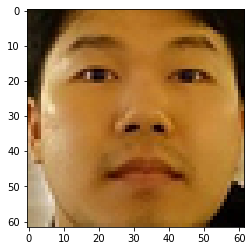

In [16]:
plt.imshow(cropped_na1)

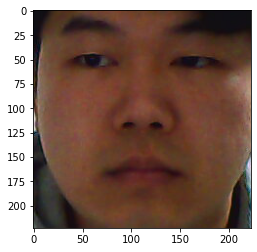

In [17]:
plt.imshow(cropped_na2)

In [18]:
# face embedding
na1_embedding = face_recognition.face_encodings(cropped_na1)
na2_embedding = face_recognition.face_encodings(cropped_na2)

In [19]:
np.array(na1_embedding).shape

(1, 128)

In [20]:
np.array(na2_embedding).shape

(1, 128)

2-2 celebrity face embedding

In [21]:
# define function to make dictinary of face embedding using name as key and embedding as value
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in tqdm(file_list):
        # [[YOUR CODE]]
        img_path = os.path.join(dir_path, file)
        face = face_recognition.load_image_file(img_path)
        embedding = face_recognition.face_encodings(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [22]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrities/cropped'
dir_path

'/home/ssac7/aiffel/face_embedding/images/celebrities/cropped'

In [23]:
start = time.time()
embedding_dict = get_face_embedding_dict(dir_path)
print(f'time elasped : {time.time()-start}')

100%|██████████| 289/289 [00:18<00:00, 15.28it/s]

time elasped : 18.9223849773407


In [24]:
# names of celebrities in embedded dictionary
embedding_dict.keys()

dict_keys(['수호', '정형돈', '길', '손예진', '강하늘', '최무성', '정우성', '최준석', '황병국', '감우성', '트와이스사나', '류진', '백윤식', '존조', '손흥민', '제이콥 배털론', '장동건', '이안 굿펠로우', '심수창', '러블리즈지수', '트와이스모모', '정수빈', '벤 에플렉', '하현우', '뷔', '피어스 브로스넌', '맷데이먼', '브래들리 쿠퍼', '유희열', '김수현', '드웨인 존슨', '줄리엔강', '박신양', '이범수', '돈스파이크', '개코', '류승범', '차두리', '이승철', '배성재', '제니', '하정우', '이영하', '강동원', '레드벨벳웬디', '잭 니콜슨', '박정민', '박완규', '류승룡', '지수', '최민식', '이정재', '슈가', '김연우', '김성균', '김유정', '황정민', '문재인', '윤도현', '잇지예지', '윤균상', '이승기', '김학범', '온앤오프효진', '김구라', '이민호', '케이', '조달환', '나인뮤지스경리', '유해진', '이경규', '김영삼', '리사', '미미', '슬리피', '시우민', '개리', '권태원', '류현진', '지코', '문별', 'RM', '이대호', '이종석', '다니엘 크레이그', '태연', '찬열', '김광현', '앤드류 응', '로제', '온앤오프와이엇', '권현빈', '조정석', '아이유', '정재형', '진', '김선호', '곽도원', '티모시 달튼', '러블리즈예인', '오정세', '효정', '지민(BTS)', '리암 니슨', '박찬호', '제이홉', '장항준', '김현수', '솔라', 'b1a4진영', '성시경', '크리스탈', '박항서', '성룡', '아이린', '화사', '배성우', '트와이스나연', '김래원', '슈퍼비', '이동국', '사무엘 L 잭슨', '박성호', '장성호', '이용진', '하승진', '양동근', '박보영', '강미나', '이제훈', '장원영', '박나래', '김종민', '손

In [25]:
embedding_dict['맷데이먼']

array([-0.08416183,  0.05088525,  0.06672516,  0.03561919, -0.12492635,
       -0.04480603,  0.02460368, -0.06709945,  0.11800983,  0.07731362,
        0.2642346 , -0.00202939, -0.24530174, -0.13600747,  0.0806212 ,
        0.06601729, -0.05185365, -0.13284811, -0.07716171, -0.04758351,
        0.07597239, -0.01417154,  0.06321276,  0.01190437, -0.14565197,
       -0.34032428, -0.06395942, -0.09860665,  0.05925141, -0.033899  ,
        0.06876869,  0.16556877, -0.24998581, -0.08270341,  0.07228874,
        0.16272561, -0.08677673, -0.0908353 ,  0.1710812 , -0.0787968 ,
       -0.12297429, -0.08651654,  0.00317926,  0.2301254 ,  0.17614336,
        0.04780525,  0.06235664, -0.03060133,  0.0965059 , -0.23675065,
        0.07480362,  0.20108035,  0.15533043,  0.02644844,  0.15569952,
       -0.11073951,  0.12592372,  0.13435221, -0.25344068,  0.00387044,
        0.05610457, -0.05697099, -0.03307727, -0.17340061,  0.23939368,
        0.0711714 , -0.06198205, -0.08591067,  0.19947006, -0.09

In [26]:
embedding_dict['맷데이먼'].shape

(128,)

+ shows the same shape with embedding from my pciture

3. compare embedded values of my pictures with celebrities'

3-1. set baseline with L2 distance betwwen embedded value of my two pictures

In [27]:
distances = np.linalg.norm(np.array(na1_embedding) - np.array(na2_embedding), ord=1)
print(f'L1 distance between my two pictures : {distances}')

In [29]:
distances = np.linalg.norm(np.array(na1_embedding) - np.array(na2_embedding), ord=2)
print(f'L2 distance between my two pictures : {distances}')

In [31]:
# make mean array of two embedded
na1_arr = np.array(na1_embedding)
na2_arr = np.array(na2_embedding)
na_embedding = np.mean( np.array([ na1_arr, na2_arr ]), axis=0 )

In [33]:
distances = np.linalg.norm(na1_arr - na_embedding, ord=2)
print(f"Distance between na1 and mean_na: {distances}")

Distance between na1 and mean_na: 0.15377153754292272


In [34]:
distances = np.linalg.norm(na2_arr - na_embedding, ord=2)
print(f"Distance between na2 and mean_na: {distances}")

Distance between na2 and mean_na: 0.15377153754292272


3_2. get distance between my embedding and celebrities'

In [35]:
def get_distance(mypic, celebrity):
    return np.linalg.norm(np.array(mypic) - embedding_dict[celebrity], ord=2)

In [36]:
get_distance(na1_embedding, '김상경')

0.5214202539012107

In [37]:
get_distance(na2_embedding, '김상경')

0.5491816621732577

In [38]:
get_distance(na_embedding, '김상경')

0.5129269966228899

In [39]:
get_distance(na1_embedding, '양동근')

0.4654412368898201

In [40]:
get_distance(na2_embedding, '양동근')

0.44244162121051256

In [41]:
get_distance(na_embedding, '양동근')

0.42725797924689685

+ somehow mean array does not have mean distance of the two from celebrities.
   + as using mean array may distort distance in a way I have not anticipated, I will use the orignal in furuter practice

4. find look alike celebrity

In [42]:
# define key function
def sort_embedding(mypic):
    def get_distance_from_mypic(celebrity):
        return get_distance(mypic, celebrity)
    return get_distance_from_mypic

In [43]:
# set key with two pictues
sort_key1 = sort_embedding(na1_embedding) 
sort_key2 = sort_embedding(na2_embedding)

In [44]:
# sort by defined key function using na1 embedding
sorted(embedding_dict.items(), key=lambda x:sort_key1(x[0]))[0]

('서장훈',
 array([-0.08017071,  0.07127385,  0.05765654,  0.00971207, -0.0979906 ,
        -0.02252272, -0.03396892, -0.10269455,  0.06839873, -0.02495763,
         0.30045944, -0.10490896, -0.19503161, -0.12736437, -0.04538194,
         0.1785502 , -0.1280151 , -0.10302404, -0.0258076 ,  0.07037197,
         0.10516738, -0.03633724,  0.07896889,  0.00691076, -0.07054859,
        -0.34632206, -0.09369332, -0.05790541,  0.02383355, -0.04508191,
        -0.08109186,  0.09443495, -0.21262071, -0.11976071,  0.03983878,
         0.10290211, -0.04310286, -0.03434477,  0.16500975,  0.00117303,
        -0.20023051,  0.04447085,  0.03950476,  0.24261644,  0.16177274,
         0.05403966,  0.03046807, -0.10892101,  0.01317187, -0.18081628,
         0.07700441,  0.13378084,  0.11791045,  0.05777892, -0.0030087 ,
        -0.09426539,  0.03181224,  0.12068279, -0.10890485,  0.01512712,
         0.10217326, -0.00929451, -0.04836053, -0.12903476,  0.21433024,
         0.0629231 , -0.11574304, -0.147238

In [45]:
# sort by defined key function using na2 embedding
sorted(embedding_dict.items(), key=lambda x:sort_key2(x[0]))[0]

('김광현',
 array([-0.06253845,  0.07231494,  0.02537463, -0.07302245, -0.04308944,
        -0.06324582, -0.04511381, -0.08501172,  0.14172955, -0.07063472,
         0.24406718, -0.06341197, -0.20622367, -0.08475046, -0.03574067,
         0.15948582, -0.18355154, -0.10798424, -0.08658166,  0.01714613,
         0.15890877, -0.01865466,  0.04176413,  0.00131008, -0.1152892 ,
        -0.29230851, -0.09705717, -0.01475064,  0.07728752, -0.03774682,
        -0.01032954, -0.02214089, -0.23048204, -0.09031495,  0.05447142,
         0.05512854, -0.0305409 , -0.07527993,  0.20719615, -0.0094217 ,
        -0.24825384,  0.03462533,  0.03309529,  0.2445942 ,  0.21513067,
         0.06985812, -0.00582221, -0.15620884,  0.12145303, -0.15272258,
         0.03913859,  0.17102386,  0.05926112,  0.0679235 , -0.01491838,
        -0.0571705 ,  0.07099287,  0.19995984, -0.13495144,  0.00302115,
         0.13534637, -0.06552907, -0.01596364, -0.08885526,  0.17592636,
        -0.0165484 , -0.12944423, -0.200510

In [46]:
# define find lookalike function
def find_lookalike(mypic, top=5):
    sort_key = sort_embedding(mypic)
    sorted_celebrities = sorted(embedding_dict.items(), key=lambda x:sort_key(x[0]))
    
    lookalike_cel = {}
    for i in range(top+1):
        print(f'순위 {i} : 이름({sorted_celebrities[i][0]}), 거리({sort_key(sorted_celebrities[i][0])})')
        
        lookalike_cel[sorted_celebrities[i][0]] = embedding_dict[sorted_celebrities[i][0]]
    
    lookalike_cel['나'] = np.array(mypic).flatten()
    
    return lookalike_cel

In [74]:
lookalike_1 = find_lookalike(na1_embedding)

순위 0 : 이름(서장훈), 거리(0.4035414823776872)
순위 1 : 이름(박휘순), 거리(0.4043535907225097)
순위 2 : 이름(배성재), 거리(0.4156323397771942)
순위 3 : 이름(최현석), 거리(0.41577147809088505)
순위 4 : 이름(손흥민), 거리(0.417373637854012)
순위 5 : 이름(정준하), 거리(0.4255802106400285)


In [75]:
lookalike_2 = find_lookalike(na2_embedding)

순위 0 : 이름(김광현), 거리(0.3977594734564183)
순위 1 : 이름(서장훈), 거리(0.40303445197101945)
순위 2 : 이름(조세호), 거리(0.4056396006084)
순위 3 : 이름(박건우), 거리(0.4083291153681222)
순위 4 : 이름(오정세), 거리(0.41985816648497176)
순위 5 : 이름(최준석), 거리(0.4224834625526434)


+ finding lookalike with embedding from two pictures gives quite different list of celebrities, except 서장훈.
  + I have never thought of 서장훈 as my look alike celebrity. 
  + may embedding pick out different features from human eye.

5. visualization

5-1. T-SNE

In [103]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [77]:
lookalike_1.keys()

dict_keys(['서장훈', '박휘순', '배성재', '최현석', '손흥민', '정준하', '나'])

In [78]:
lookalike_2.keys()

dict_keys(['김광현', '서장훈', '조세호', '박건우', '오정세', '최준석', '나'])

In [79]:
old_keys = lookalike_1.keys()

In [80]:
old_keys = list(old_keys)
old_keys

['서장훈', '박휘순', '배성재', '최현석', '손흥민', '정준하', '나']

In [81]:
new_keys = ['soe', 'park', 'bae', 'choi', 'son', 'jung', 'I']

In [82]:
new_keys

['soe', 'park', 'bae', 'choi', 'son', 'jung', 'I']

In [83]:
for i in range(len(lookalike_1)):
    lookalike_1[new_keys[i]] = lookalike_1.pop(list(old_keys)[i])
    print(lookalike_1.keys())

dict_keys(['박휘순', '배성재', '최현석', '손흥민', '정준하', '나', 'soe'])
dict_keys(['배성재', '최현석', '손흥민', '정준하', '나', 'soe', 'park'])
dict_keys(['최현석', '손흥민', '정준하', '나', 'soe', 'park', 'bae'])
dict_keys(['손흥민', '정준하', '나', 'soe', 'park', 'bae', 'choi'])
dict_keys(['정준하', '나', 'soe', 'park', 'bae', 'choi', 'son'])
dict_keys(['나', 'soe', 'park', 'bae', 'choi', 'son', 'jung'])
dict_keys(['soe', 'park', 'bae', 'choi', 'son', 'jung', 'I'])


In [85]:
for i in lookalike_1.values():
    print(i.shape)
    print(type(i))

(128,)
<class 'numpy.ndarray'>
(128,)
<class 'numpy.ndarray'>
(128,)
<class 'numpy.ndarray'>
(128,)
<class 'numpy.ndarray'>
(128,)
<class 'numpy.ndarray'>
(128,)
<class 'numpy.ndarray'>
(128,)
<class 'numpy.ndarray'>


In [86]:
lookalike_1.keys()

dict_keys(['soe', 'park', 'bae', 'choi', 'son', 'jung', 'I'])

In [87]:
data_1 = pd.DataFrame.from_dict(lookalike_1)
data_1

,soe,park,bae,choi,son,jung,I
0,-0.080171,0.002319,-0.016665,-0.005426,-0.088190,-0.093233,-0.081263
1,0.071274,0.080138,0.103001,0.072267,0.097274,0.065716,0.062719
2,0.057657,0.056704,0.028497,0.019019,0.054721,0.053112,0.063467
3,0.009712,0.015126,-0.016365,0.004081,0.007829,-0.000260,-0.014660
4,-0.097991,-0.091459,-0.050447,-0.095814,-0.100332,-0.065026,-0.068778
...,...,...,...,...,...,...,...
123,-0.025391,-0.070809,-0.033034,-0.012295,-0.065906,-0.072759,0.006099
124,0.124801,0.087730,0.073789,0.135957,0.049371,0.102709,0.151693
125,-0.021394,0.017107,-0.010250,0.024505,-0.007300,-0.016286,-0.000555
126,0.027307,0.071069,0.014951,0.020279,0.028140,0.025974,0.047288


In [88]:
data_1 = data_1.T
data_1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
soe,-0.080171,0.071274,0.057657,0.009712,-0.097991,-0.022523,-0.033969,-0.102695,0.068399,-0.024958,...,0.146256,0.075264,0.025798,-0.005613,-0.220746,-0.025391,0.124801,-0.021394,0.027307,0.014790
park,0.002319,0.080138,0.056704,0.015126,-0.091459,-0.022114,-0.048351,-0.129434,0.081715,-0.127813,...,0.156893,0.120426,0.041885,-0.017161,-0.275601,-0.070809,0.087730,0.017107,0.071069,0.029153
bae,-0.016665,0.103001,0.028497,-0.016365,-0.050447,-0.003682,-0.075163,-0.073315,0.127459,-0.087387,...,0.143199,0.150001,0.031602,0.018762,-0.245873,-0.033034,0.073789,-0.010250,0.014951,0.005844
choi,-0.005426,0.072267,0.019019,0.004081,-0.095814,-0.009702,0.006321,-0.119440,0.096062,-0.053236,...,0.067238,0.108450,0.016250,-0.023977,-0.247204,-0.012295,0.135957,0.024505,0.020279,-0.033663
son,-0.088190,0.097274,0.054721,0.007829,-0.100332,-0.070152,-0.075037,-0.141693,0.038141,-0.071552,...,0.101105,0.113383,0.070214,-0.005070,-0.195553,-0.065906,0.049371,-0.007300,0.028140,0.043592
jung,-0.093233,0.065716,0.053112,-0.000260,-0.065026,-0.049478,-0.034288,-0.165096,0.057969,-0.102919,...,0.121208,0.068959,0.022187,0.057638,-0.272231,-0.072759,0.102709,-0.016286,0.025974,0.030555
I,-0.081263,0.062719,0.063467,-0.014660,-0.068778,-0.059385,-0.036035,-0.141381,0.075712,-0.099661,...,0.142264,0.139702,0.014400,-0.019679,-0.244127,0.006099,0.151693,-0.000555,0.047288,0.006203


In [99]:
list(range(3))

[0, 1, 2]

In [100]:
data_1['name'] = data_1.index
data_1.index = list(range(7))
data_1

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,name
0,-0.080171,0.071274,0.057657,0.009712,-0.097991,-0.022523,-0.033969,-0.102695,0.068399,-0.024958,...,0.075264,0.025798,-0.005613,-0.220746,-0.025391,0.124801,-0.021394,0.027307,0.014790,soe
1,0.002319,0.080138,0.056704,0.015126,-0.091459,-0.022114,-0.048351,-0.129434,0.081715,-0.127813,...,0.120426,0.041885,-0.017161,-0.275601,-0.070809,0.087730,0.017107,0.071069,0.029153,park
2,-0.016665,0.103001,0.028497,-0.016365,-0.050447,-0.003682,-0.075163,-0.073315,0.127459,-0.087387,...,0.150001,0.031602,0.018762,-0.245873,-0.033034,0.073789,-0.010250,0.014951,0.005844,bae
3,-0.005426,0.072267,0.019019,0.004081,-0.095814,-0.009702,0.006321,-0.119440,0.096062,-0.053236,...,0.108450,0.016250,-0.023977,-0.247204,-0.012295,0.135957,0.024505,0.020279,-0.033663,choi
4,-0.088190,0.097274,0.054721,0.007829,-0.100332,-0.070152,-0.075037,-0.141693,0.038141,-0.071552,...,0.113383,0.070214,-0.005070,-0.195553,-0.065906,0.049371,-0.007300,0.028140,0.043592,son
5,-0.093233,0.065716,0.053112,-0.000260,-0.065026,-0.049478,-0.034288,-0.165096,0.057969,-0.102919,...,0.068959,0.022187,0.057638,-0.272231,-0.072759,0.102709,-0.016286,0.025974,0.030555,jung
6,-0.081263,0.062719,0.063467,-0.014660,-0.068778,-0.059385,-0.036035,-0.141381,0.075712,-0.099661,...,0.139702,0.014400,-0.019679,-0.244127,0.006099,0.151693,-0.000555,0.047288,0.006203,I


In [102]:
data_1_mat = data_1.iloc[:, :-1].values
result = TSNE().fit_transform(data_1_mat)
df_result_tsne = pd.DataFrame(result, columns = ['v1', 'v2']).assign(name = data_1['name'])
df_result_tsne

,v1,v2,name
0,-41.084370,-201.442337,soe
1,116.219383,50.069160,park
2,-180.254227,60.546204,bae
3,-35.041027,-30.274628,choi
4,-28.992540,140.893814,son
5,-186.299652,-110.624130,jung
6,110.175491,-121.098045,I


<AxesSubplot:xlabel='v1', ylabel='v2'>

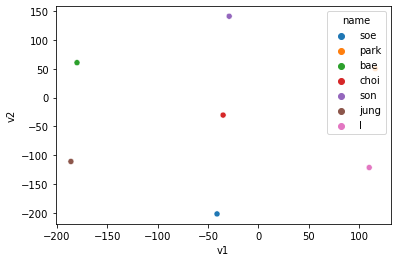

In [105]:
sns.scatterplot(data=df_result_tsne, x='v1', y='v2', hue='name')

5-2. PCA

In [112]:
from sklearn.decomposition import PCA

In [113]:
result = PCA(n_components=2).fit_transform(data_1_mat)
df_result_pca = pd.DataFrame(result, columns = ['v1', 'v2']).assign(name = data_1['name'])
df_result_pca

,v1,v2,name
0,0.203633,0.087294,soe
1,-0.111742,0.027033,park
2,-0.068972,0.035201,bae
3,0.172770,-0.185132,choi
4,-0.197154,-0.144858,son
5,-0.031666,0.229644,jung
6,0.033132,-0.049182,I


<AxesSubplot:xlabel='v1', ylabel='v2'>

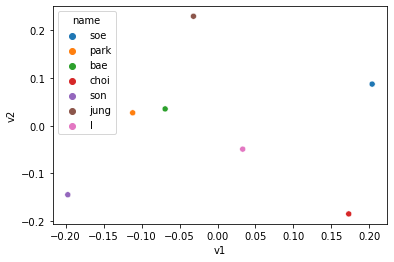

In [114]:
sns.scatterplot(data=df_result_pca, x='v1', y='v2', hue='name')

5-3. lookalike celebrities from picture 1

In [115]:
# find file names having same string with dictionary key
temp = []
for key in old_keys:
    for file in file_list:
        if key in file:
            temp.append(file)
temp

['서장훈.jpg',
 '박휘순.jpg',
 '배성재.jpg',
 '최현석.jpg',
 '손흥민.jpg',
 '정준하.jpg',
 '트와이스사나.jpg',
 '나인뮤지스경리.jpg',
 '트와이스나연.jpg',
 '강미나.jpg',
 '박나래.jpeg',
 '트와이스미나.jpg',
 '잇지유나.jpg',
 '레오나르도 디카프리오.jpeg']

In [116]:
temp = temp[0:6]
temp

['서장훈.jpg', '박휘순.jpg', '배성재.jpg', '최현석.jpg', '손흥민.jpg', '정준하.jpg']

In [117]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrities'

/home/ssac7/aiffel/face_embedding/images/celebrities/서장훈.jpg
/home/ssac7/aiffel/face_embedding/images/celebrities/박휘순.jpg
/home/ssac7/aiffel/face_embedding/images/celebrities/배성재.jpg
/home/ssac7/aiffel/face_embedding/images/celebrities/최현석.jpg
/home/ssac7/aiffel/face_embedding/images/celebrities/손흥민.jpg
/home/ssac7/aiffel/face_embedding/images/celebrities/정준하.jpg


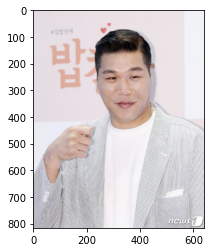

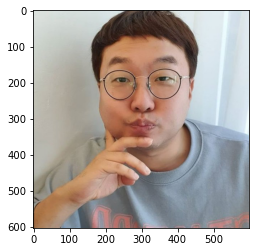

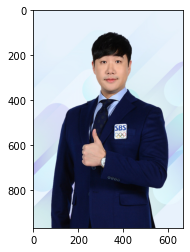

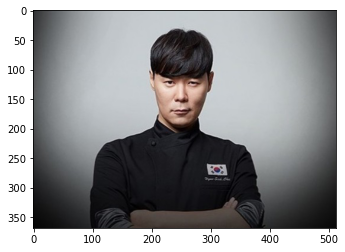

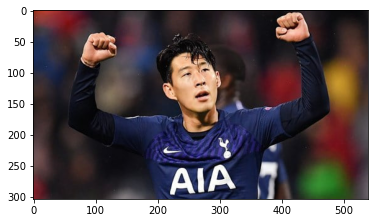

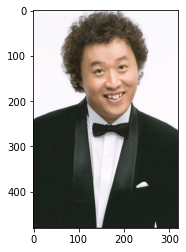

In [118]:
for i in range(len(temp)):
    file_path = os.path.join(dir_path, temp[i])
    image = face_recognition.load_image_file(file_path)
    print(file_path)
    plt.figure()
    plt.imshow(image)

---

### Thoguths

+ distance measured with embedded values may differ as used image dataset in embedding process.
   + simple embedding may not be enough to make convincing fun application.